In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes

df = pd.read_csv('~/Documents/SpringProjectDataNotebook/spotify_dataset.csv')
spotify = df.copy()
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
# adding genre to df
genre = []
new_genre = []

for j in df.index:
    lst = df.loc[j,'Genre'][1:-1].split(', ')
    for i in lst:
        genre.append(i[1:-1])
        

new_genre = []
for i in genre:
    if i not in new_genre:
        new_genre.append(i)

new = pd.DataFrame()

for j in df.index:
    lst = [i[1:-1] for i in df.iloc[j].Genre[1:-1].split(', ')]
    for k in lst:
        new.loc[j,k]=1
        
new = new.fillna(0)

df = pd.concat([df,new], axis=1)
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,albanian hip hop,venezuelan hip hop,meme rap,grime,brega funk,moombahton,pittsburgh rap,new orleans rap,deep german hip hop,turkish trap
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['Week of Highest Charting'] = df['Week of Highest Charting'].apply(lambda x: x.split('--')[0])

df['Year_Week of Highest Charting'] = pd.to_datetime(df['Week of Highest Charting'])
df['Month_Week of Highest Charting'] = pd.to_datetime(df['Week of Highest Charting'])

df['Year_Week of Highest Charting'] = df['Year_Week of Highest Charting'].dt.year
df['Month_Week of Highest Charting'] = df['Month_Week of Highest Charting'].dt.month

df = df.drop('Week of Highest Charting', axis=1)

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Year'] = df['Release Date'].dt.year
df = df.drop('Release Date', axis=1)

df.Streams = pd.to_numeric(df.Streams.apply(lambda x: x.replace(',','')))
df.head()

,Index,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Weeks Charted,...,grime,brega funk,moombahton,pittsburgh rap,new orleans rap,deep german hip hop,turkish trap,Year_Week of Highest Charting,Month_Week of Highest Charting,Release Year
0,1,1,8,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2017.0
1,2,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2021.0
2,3,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,6,2021.0
3,4,3,5,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2021.0
4,5,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23--2021-07-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2021.0


In [6]:
to_drop = ['Index', 'Song Name', 'Artist', 'Song ID', 'Genre', 'Weeks Charted']
df = df.drop(to_drop,axis=1)
df.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,...,grime,brega funk,moombahton,pittsburgh rap,new orleans rap,deep german hip hop,turkish trap,Year_Week of Highest Charting,Month_Week of Highest Charting,Release Year
0,1,8,48633449,3377762,100,0.714,0.8,-4.808,0.0504,0.127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2017.0
1,2,3,47248719,2230022,99,0.591,0.764,-5.484,0.0483,0.0383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2021.0
2,1,11,40162559,6266514,99,0.563,0.664,-5.044,0.154,0.335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,6,2021.0
3,3,5,37799456,83293380,98,0.808,0.897,-3.712,0.0348,0.0469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2021.0
4,5,1,33948454,5473565,96,0.736,0.704,-7.409,0.0615,0.0203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,7,2021.0


In [7]:
org = [i for i in df.columns if i not in new_genre]
cols = df[org].select_dtypes(include=['object']).columns
cols = [i for i in cols if i not in ['Chord']]

for i in cols:    
    df[i] = pd.to_numeric(df[i], errors='coerce')

cat_var = ['Chord', 'Year_Week of Highest Charting', 'Month_Week of Highest Charting', 'Release Year']
df = pd.get_dummies(data=df, columns=cat_var, prefix=cat_var, drop_first=True)
df.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Release Year_2012.0,Release Year_2013.0,Release Year_2014.0,Release Year_2015.0,Release Year_2016.0,Release Year_2017.0,Release Year_2018.0,Release Year_2019.0,Release Year_2020.0,Release Year_2021.0
0,1,8,48633449,3377762.0,100.0,0.714,0.800,-4.808,0.0504,0.1270,...,0,0,0,0,0,1,0,0,0,0
1,2,3,47248719,2230022.0,99.0,0.591,0.764,-5.484,0.0483,0.0383,...,0,0,0,0,0,0,0,0,0,1
2,1,11,40162559,6266514.0,99.0,0.563,0.664,-5.044,0.1540,0.3350,...,0,0,0,0,0,0,0,0,0,1
3,3,5,37799456,83293380.0,98.0,0.808,0.897,-3.712,0.0348,0.0469,...,0,0,0,0,0,0,0,0,0,1
4,5,1,33948454,5473565.0,96.0,0.736,0.704,-7.409,0.0615,0.0203,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df = df.dropna()
df.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Release Year_2012.0,Release Year_2013.0,Release Year_2014.0,Release Year_2015.0,Release Year_2016.0,Release Year_2017.0,Release Year_2018.0,Release Year_2019.0,Release Year_2020.0,Release Year_2021.0
0,1,8,48633449,3377762.0,100.0,0.714,0.800,-4.808,0.0504,0.1270,...,0,0,0,0,0,1,0,0,0,0
1,2,3,47248719,2230022.0,99.0,0.591,0.764,-5.484,0.0483,0.0383,...,0,0,0,0,0,0,0,0,0,1
2,1,11,40162559,6266514.0,99.0,0.563,0.664,-5.044,0.1540,0.3350,...,0,0,0,0,0,0,0,0,0,1
3,3,5,37799456,83293380.0,98.0,0.808,0.897,-3.712,0.0348,0.0469,...,0,0,0,0,0,0,0,0,0,1
4,5,1,33948454,5473565.0,96.0,0.736,0.704,-7.409,0.0615,0.0203,...,0,0,0,0,0,0,0,0,0,1


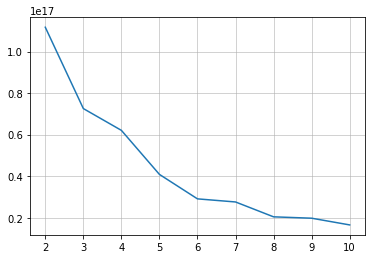

In [9]:
from kmodes.kprototypes import KPrototypes
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = [i for i in df.columns if i not in num_cols]
categorical = [i[0] for i in enumerate(df) if i[1] in cat_cols]
clusters = [2,3,4,5,6,7,8,9,10]
costs = []

for i in clusters:
    kp = KPrototypes(n_clusters=i, n_init=5)
    kp.fit_predict(np.array(df), categorical=categorical)
    costs.append(kp.cost_)
    

plt.plot(clusters, costs)
plt.grid(alpha=0.7)
plt.show()

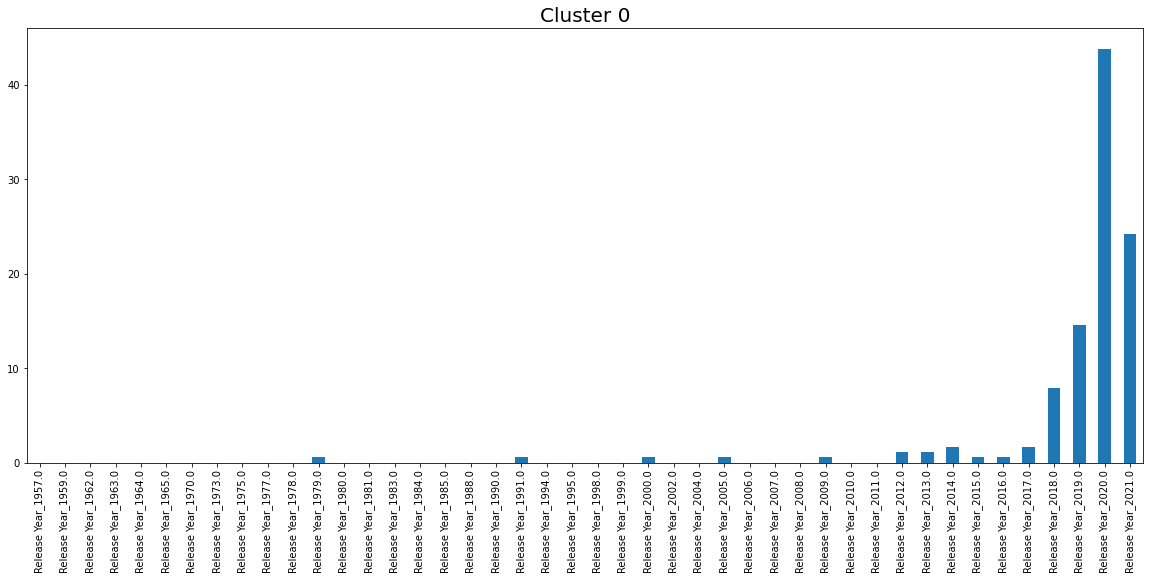

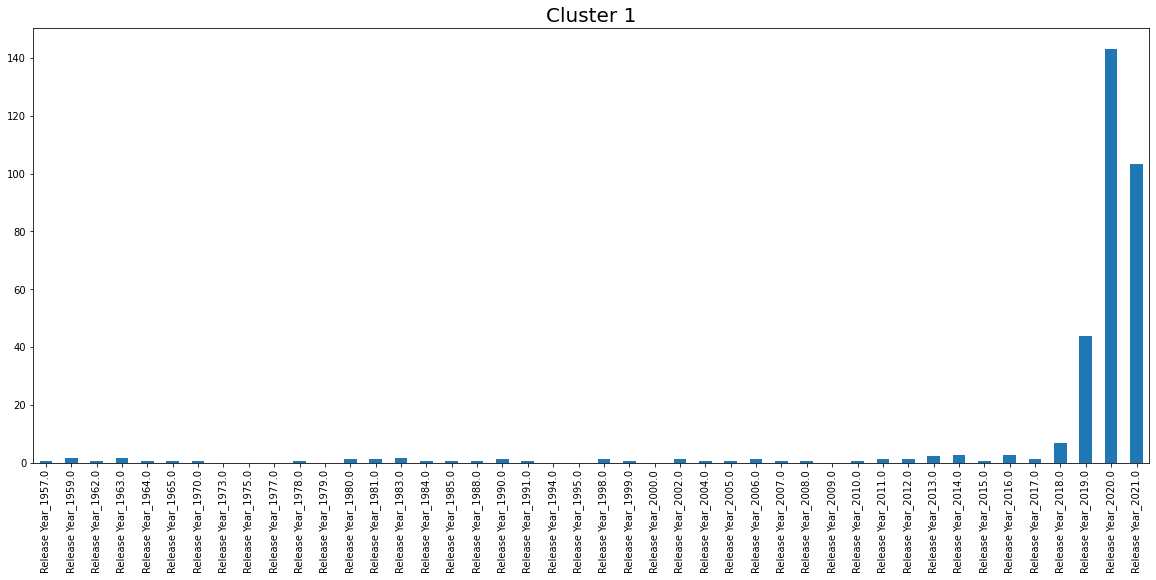

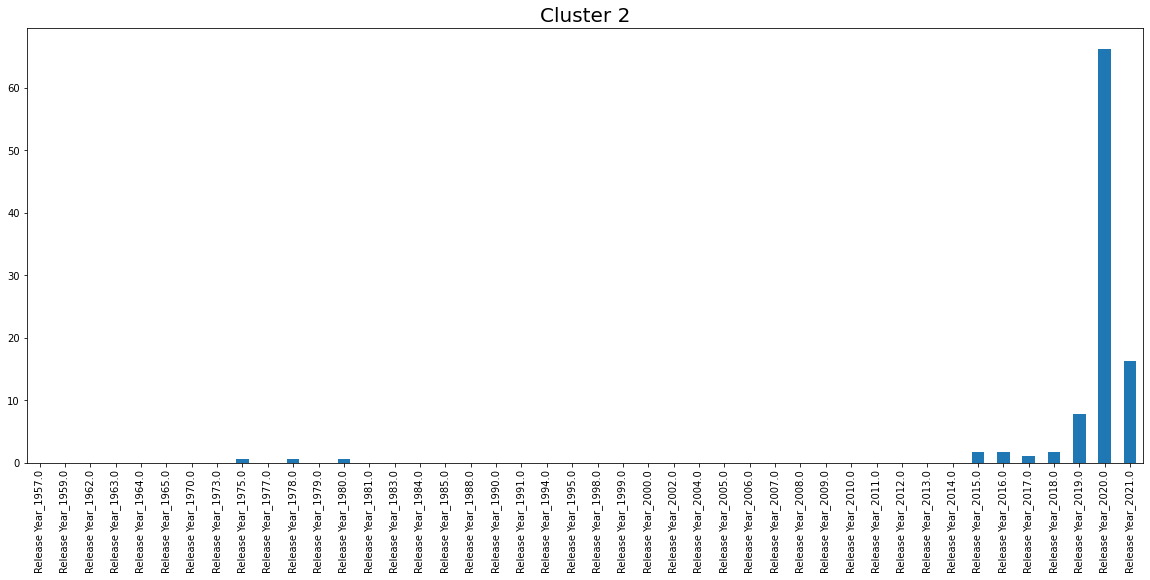

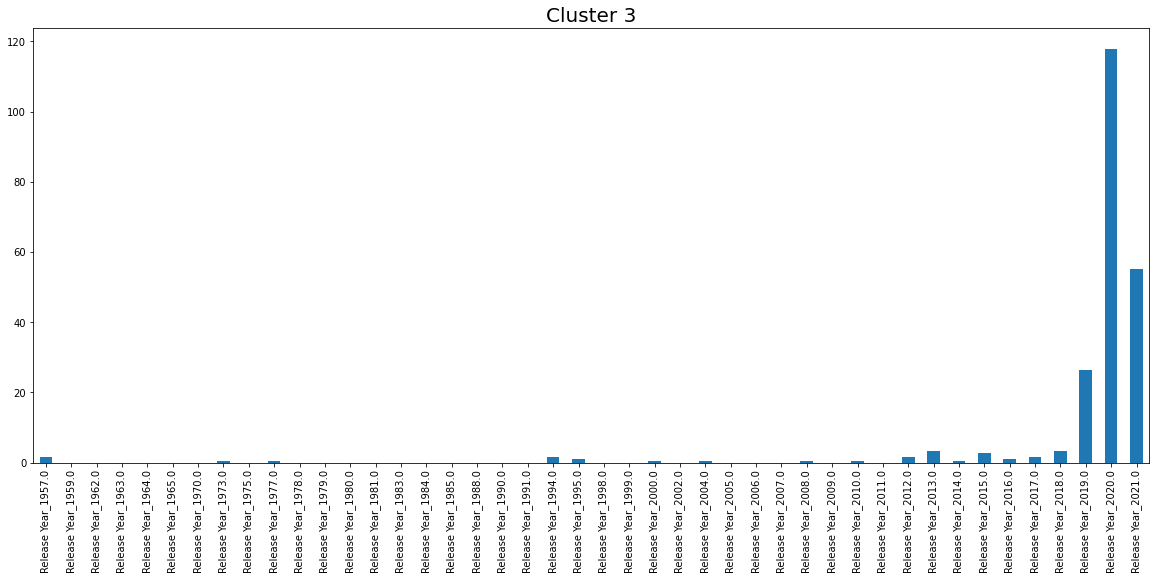

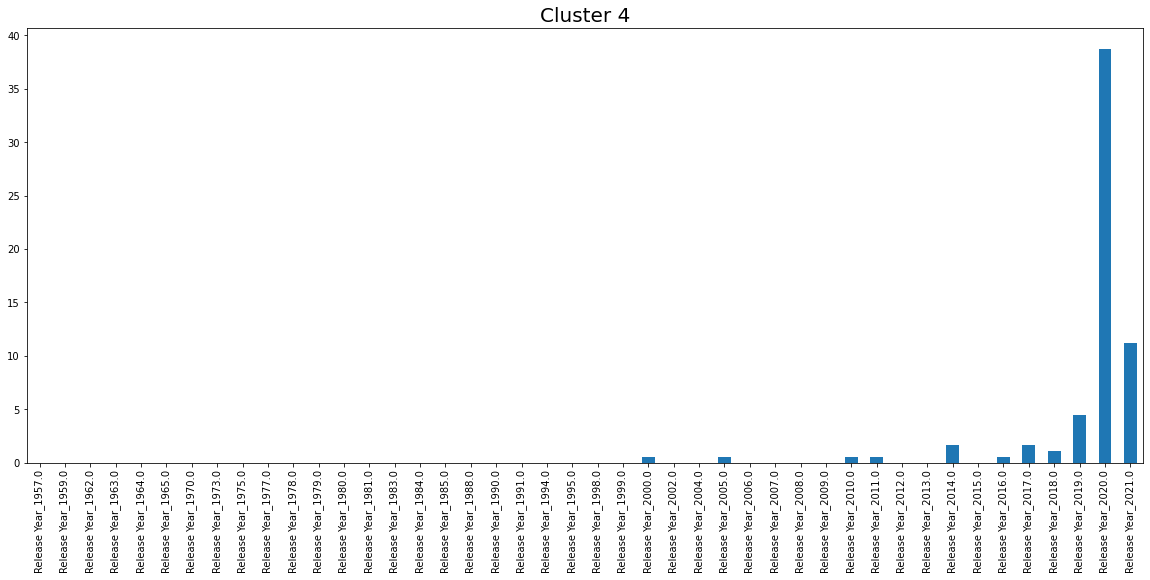

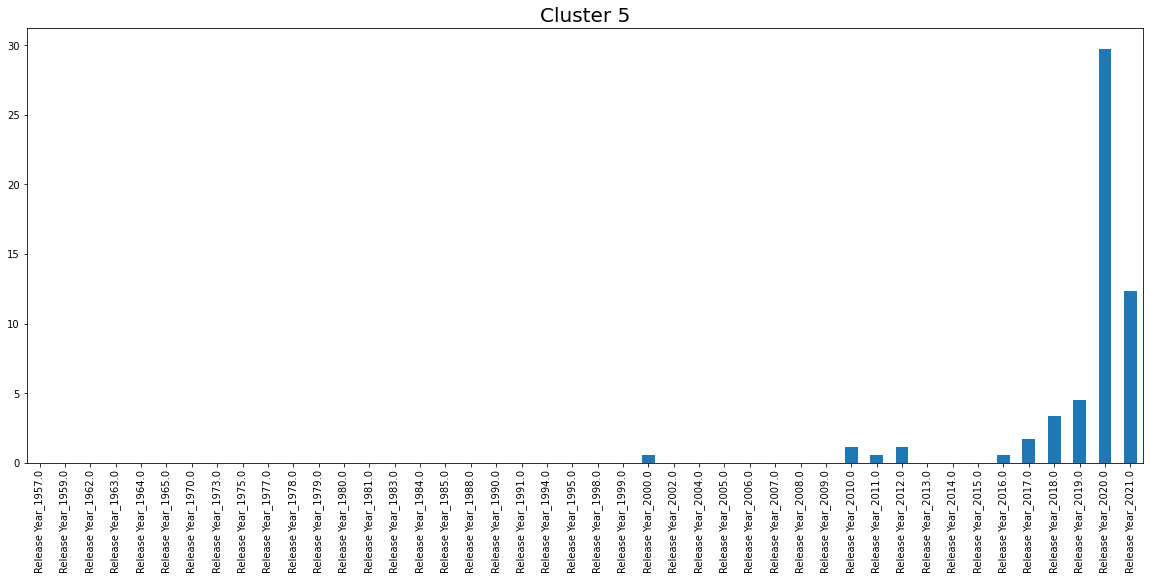

In [10]:
kp = KPrototypes(n_clusters=6, n_init=10, random_state=20)
kp.fit_predict(np.array(df), categorical=categorical)
df['cluster_id'] = kp.labels_

release = [i for i in df.columns if 'Release' in i]

for i in np.unique(df.cluster_id):
    percent = 100*df[df['cluster_id']==i][release].sum()/df[df['cluster_id']==0][release].sum().sum()
    plt.figure(figsize=(20,8))
    percent.plot.bar()
    plt.title('Cluster {0}'.format(i), fontsize=20)
    plt.show()

In [12]:
df.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Release Year_2013.0,Release Year_2014.0,Release Year_2015.0,Release Year_2016.0,Release Year_2017.0,Release Year_2018.0,Release Year_2019.0,Release Year_2020.0,Release Year_2021.0,cluster_id
0,1,8,48633449,3377762.0,100.0,0.714,0.800,-4.808,0.0504,0.1270,...,0,0,0,0,1,0,0,0,0,3
1,2,3,47248719,2230022.0,99.0,0.591,0.764,-5.484,0.0483,0.0383,...,0,0,0,0,0,0,0,0,1,3
2,1,11,40162559,6266514.0,99.0,0.563,0.664,-5.044,0.1540,0.3350,...,0,0,0,0,0,0,0,0,1,3
3,3,5,37799456,83293380.0,98.0,0.808,0.897,-3.712,0.0348,0.0469,...,0,0,0,0,0,0,0,0,1,4
4,5,1,33948454,5473565.0,96.0,0.736,0.704,-7.409,0.0615,0.0203,...,0,0,0,0,0,0,0,0,1,3


In [11]:
spotify['cluster_id'] = df.cluster_id
spotify = spotify[['Song Name', 'Artist', 'cluster_id', 'Streams']]
spotify.head()

,Song Name,Artist,cluster_id,Streams
0,Beggin',Måneskin,3.0,"48,633,449"
1,STAY (with Justin Bieber),The Kid LAROI,3.0,"47,248,719"
2,good 4 u,Olivia Rodrigo,3.0,"40,162,559"
3,Bad Habits,Ed Sheeran,4.0,"37,799,456"
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,3.0,"33,948,454"


In [12]:
spotify.to_csv('spotify_cluster.csv', index=False, encoding='utf-8')